<a id='2.2'></a>
# <font size=5 face='Roboto' color='white'>Implementing Linear Regression in JAX</font>

In [15]:
import jax
import jaxlib
import jax.numpy as jnp

In [16]:
x = jnp.arange(5)
print(x)

[0 1 2 3 4]


In [17]:
x, type(x)

(Array([0, 1, 2, 3, 4], dtype=int32), jaxlib.xla_extension.ArrayImpl)

In [18]:
import torch

tensor_a = torch.arange(1, 25., requires_grad=True)
tensor_a

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)

In [19]:
def square(n: torch.Tensor) -> torch.Tensor:
    return torch.sum(torch.pow(n, 2))

In [20]:
b = square(tensor_a)
b

tensor(4900., grad_fn=<SumBackward0>)

In [21]:
b.backward()
print(tensor_a.grad)
print(tensor_a)

tensor([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26., 28.,
        30., 32., 34., 36., 38., 40., 42., 44., 46., 48.])
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24.], requires_grad=True)


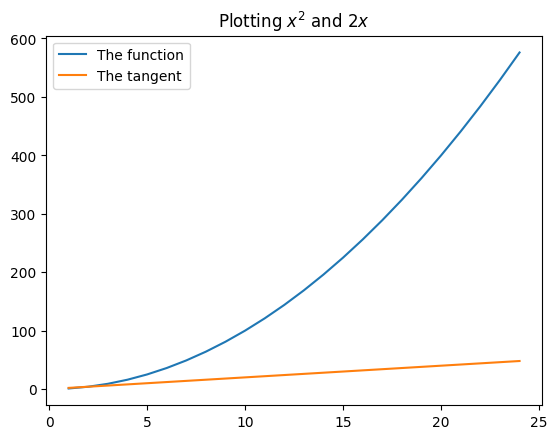

In [22]:
import matplotlib.pyplot as plt

xs = tensor_a.detach().numpy()
ys = xs ** 2
y_dash = 2 * xs

plt.plot(xs, ys, label='The function')
plt.plot(xs, y_dash, label='The tangent')
plt.legend()
plt.title('Plotting $x^2$ and $2x$')
plt.show()

In [23]:
def sum_of_squares(x: jnp.ndarray):
    return jnp.sum(x ** 2)

In [24]:
tensor_a = jnp.arange(1, 25.)

In [25]:
sum_of_squares(tensor_a)

Array(4900., dtype=float32)

In [26]:
sum_of_squares_dx = jax.grad(sum_of_squares)      # this is, for all intents and purposes- 2x, a function that multiplies data with 2

In [27]:
sum_of_squares_dx(tensor_a)

Array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.],      dtype=float32)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataset link: https://www.kaggle.com/datasets/smid80/weatherww2/data

weather_data_ = pd.read_csv('Summary of Weather.csv')
weather_data = weather_data_[['MaxTemp', 'MinTemp']].reset_index()
weather_data.sample(5)

<ipython-input-28-6b3b1d732217>:7: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data_ = pd.read_csv('Summary of Weather.csv')


,index,MaxTemp,MinTemp
83945,83945,20.555556,10.000000
88083,88083,45.555556,22.777778
117018,117018,31.666667,13.333333
102226,102226,32.222222,23.888889
9281,9281,27.777778,21.111111


In [29]:
X, Y = jnp.array(weather_data[['MinTemp']].to_numpy(dtype=float)), jnp.array(weather_data[['MaxTemp']].to_numpy(dtype=float))

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
@jax.jit
def model(theta: jnp.ndarray, x: jnp.ndarray):
    w, b = theta
    return w * x + b

@jax.jit
def loss_fn(theta: jnp.ndarray, x: jnp.ndarray, y: jnp.ndarray):
    prediction = model(theta, x)
    return jnp.mean((prediction - y) ** 2)

@jax.jit
def update(theta: jnp.ndarray,
          x: jnp.ndarray,
          y: jnp.ndarray,
          lr: float = 0.1):

    return theta - lr * jax.grad(loss_fn)(theta, x, y)


In [32]:
theta = jnp.array([1., 1])

Text(0.5, 1.0, 'Regression on Temperatures During WWII')

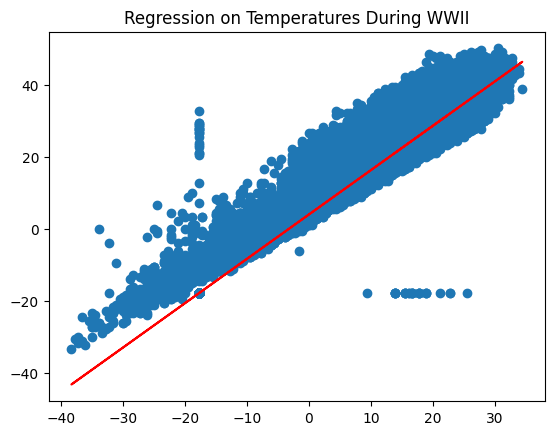

In [33]:
for _ in range(1000):
    theta = update(theta, x_train, y_train, lr=0.001)

plt.scatter(x_train, y_train)
plt.plot(x_train, model(theta, x_train), 'r')
plt.title('Regression on Temperatures During WWII')

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(np.array(y_test), np.array(model(theta, x_test)), squared=False)

5.0338135

In [36]:
from jax import random

key = random.PRNGKey(84)

key

Array([ 0, 84], dtype=uint32)

In [37]:
print(random.uniform(key))
print(random.uniform(key))

0.4272107
0.4272107


In [38]:
new_key, subkey = random.split(key)

del key

print(random.normal(new_key))
print(random.normal(subkey))

-1.3415899
-0.24351525


<a id='2.2'></a>
# <font size=5 face='Roboto' color='white'>Implementing Logistic Regression in JAX</font>

In [39]:
@jax.jit
def sigmoid(x: jnp.ndarray):
    return 1 / (1 + jnp.exp(-x))

Text(0.5, 1.0, 'The Plot of Sigmoid Function')

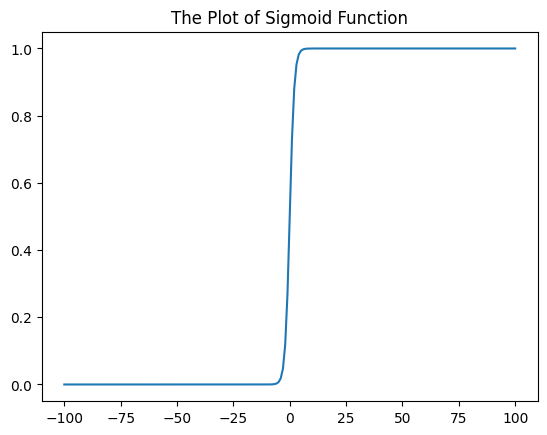

In [40]:
plt.plot(jnp.arange(-100, 101), sigmoid(jnp.arange(-100, 101)))
plt.title('The Plot of Sigmoid Function')

In [41]:
key = random.PRNGKey(42)

In [42]:
key, W_key, b_key = random.split(key, 3)

In [43]:
from math import sqrt


def init_parameters(x: jnp.ndarray):
    n_features = x.shape[-1]

    W = random.normal(key=W_key, shape=(n_features,)) * (sqrt(2/x.shape[0]))
    b = random.normal(key=b_key, shape=()) * (sqrt(2/x.shape[0]))
    return W, b

In [44]:
@jax.jit
def lr_model(x: jnp.ndarray, W: jnp.ndarray, b: jnp.ndarray):
    '''
    Implements the Logistic Regression model.
    '''
    return jax.nn.sigmoid(jnp.dot(x, W) + b)

In [45]:
epsilon = 1e-6

In [46]:
@jax.jit
def nll_loss(W: jnp.ndarray,
             b: jnp.ndarray):
    predictions = lr_model(X_train, W, b)
    label_probas = jnp.log(predictions + epsilon) * y_train + jnp.log(1 - predictions + epsilon) * (1 - y_train)
    return -jnp.mean(label_probas)

In [47]:
@jax.jit
def update(W: jnp.ndarray, b: jnp.ndarray, lr: float = 3e-3):

    W_grads, b_grads = jax.grad(nll_loss, (0, 1))(W, b)

    W -= lr * W_grads
    b -= lr * b_grads

    return W, b

<a id='2.3'></a>
# <font size=5 face='Roboto' color='white'> Solving a Problem with Logistic Regression</font>

In [48]:
import pandas as pd

#dataset link: https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking
candy_power_data = pd.read_csv('candy-data.csv').drop(['competitorname'], axis=1)
candy_power_data.sample(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
19,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
27,1,0,0,0,0,0,0,0,1,0.197,0.511,57.219250
46,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597
7,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


In [49]:
X = jnp.asarray(np.array(candy_power_data.drop(['chocolate'], axis=1)), dtype='float32')
y = jnp.asarray(np.array(candy_power_data[['chocolate']]), dtype='bool').flatten()

X.shape, y.shape

((85, 11), (85,))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 11), (63,), (22, 11), (22,))

In [51]:
W, b = init_parameters(X_train)

In [52]:
from tqdm.notebook import tqdm

for _ in tqdm(range(2_000), desc="Training..."): # the main update loop
    W, b = update(W, b, lr=0.001)

Training...:   0%|          | 0/2000 [00:00<?, ?it/s]

In [53]:
def lr_model_predictor(x: jnp.ndarray,
                      W: jnp.ndarray = W,
                      b: jnp.ndarray = b):

    pred = lr_model(x, W, b)
    if pred > 0.5:
        return True
    return False

In [54]:
predictions = []

for i in range(len(X_test)):
    predictions.append(lr_model_predictor(X_test[i]))

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
100*accuracy_score(predictions, y_test)

90.9090909090909